You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U2proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU2proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 2 Project: Flipping Metaphorical Coins

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Anything that can be looked at as either being yes or no, success or faliure, can be modeled with the betabinomial model. Examples: BAP3 introduces the betabinomial model with coin flipping, and Richard McElreath starts with guessing the proportion of surface water covering a planet in his book Statistical Rethinking.

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

-  Use your best idea now; you could use the same context the whole course and learn everything you need to know. Its more than ok to use the same context, or even some of the same data, from unit to unit.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit2NotesAK *is* your example! You are expected to be somewhere between a half and a quarter as detailed--but more is always welcome.

**Actual Project!!!!!!**

What I intend to model in this project is the likelihood that an NBA player playing an NBA game on their birthday will have a better, or more statistically impressive game than they do on average.

I aim to do this using the basketball metric "Game Score." Game score works a lot like the metric PER, except it is cumulative, that is, it doesn't adjust for the amount of time a player plays for. Because of this, game score does a good job of measuring the overall positive impact a player had over the course of the entire game, not valuing very stong play over a short period of time.

Because of this, game score captures well what we conventionally think of as a "good game." A high game score indicates a large amount of positive statistical contributions during the game. Things like triple doubles and 50-point games directly lead to high game scores. I will measure whether a player had a better game than usual by comparing their game score in their birthday game to their average game score in the season that said game was played in.

I expect that Players will try harder, and maybe be given additional play time by their coaches on their birthdays, leading to a hgiher than 50% chance that they will have a better game on their birthday. Say a little over 60%.

I'm not extremely confident in that guess though, so I won't use an extremely strong prior. I'll use

$$Beta(\alpha = 10, \beta = 6)$$

Before I get ahead of myself, lets import everything we'll need

In [2]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


Now lets graph our prior

<Axes: >

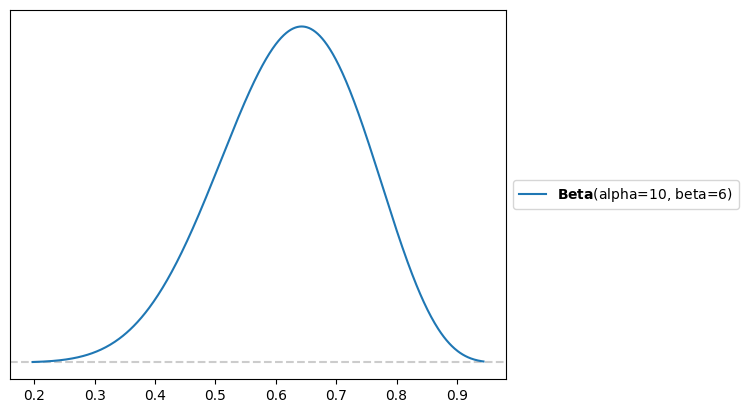

In [3]:
pz.Beta(alpha=10,beta=6).plot_pdf()

This matches my intuition a player probably  has a 60 or 70% chance of playing better on their birthday. Let's now incorporate our data. After much [data wrangling
](https://docs.google.com/spreadsheets/d/1JDDF0i2SBOsaPDE3zLBTbw07AgyWdavl/edit?usp=sharing&ouid=103315897762107030769&rtpof=true&sd=true), I found the actual outcomes of every game in which it was a player's birthday and whether that player played better. All in all, 93/209 players who played on their birtheday played better. We can represent the probability of different outcomes if this data represnted the true probability with the binomial distribution.




<Axes: >

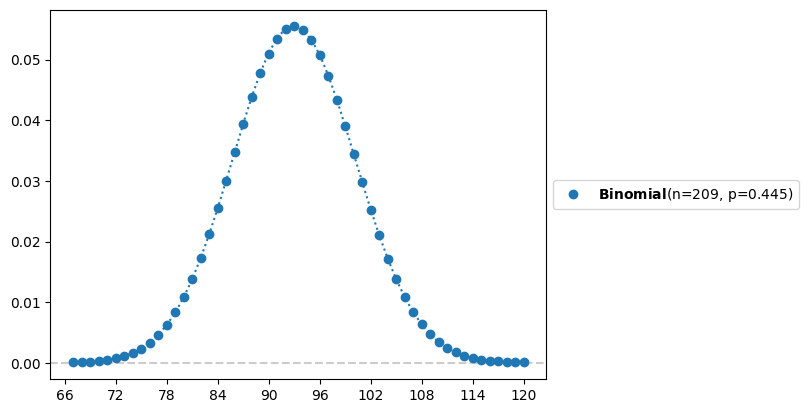

In [4]:
pz.Binomial(n = 209, p = 93/209 ).plot_pdf()

Now we can update our prior using this new data.

In [5]:
#prior information (total guess lol)
alpha_old = 10
beta_old = 6

#likelihood info, or data from the NBA
k = 93 #makes
n = 209 #total attempts


analytic_Bday = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

#Wembanyama' likelihood of playing better on BDay.
analytic_Bday.mean()

0.4577777777777778

And the full distribution

<Axes: >

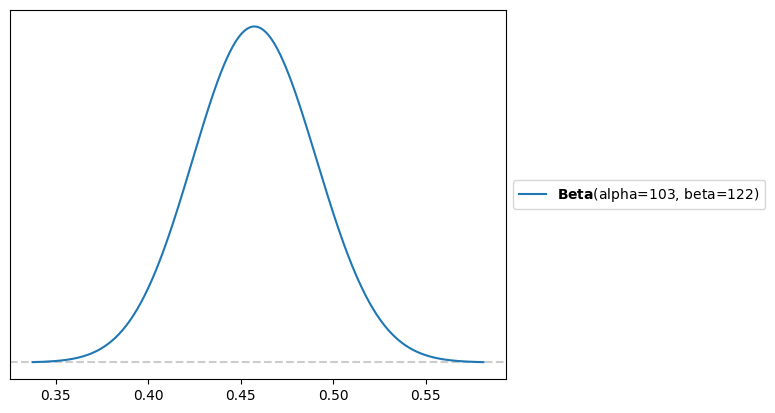

In [6]:
analytic_Bday.plot_pdf()

Now, we can try and predict future outcomes using sampling (MCMC)

In [24]:
import pymc as pm
#Games where the player played better
Better_Games = np.repeat(1, 93)
#Games where the player played worse
Worse_Games = np.repeat(0, 116)
Games = np.concatenate([Better_Games, Worse_Games])
with pm.Model() as BDay_better_model:
  #Define Prior
  θ = pm.Beta('θ' , alpha = 10. , beta = 6.)
  #Define Bernoulli
  y = pm.Bernoulli('y', p = θ, observed = Games)

  #Sample from our posterior a bunch of times
  idata_BDay = pm.sample(10000)

And now we can visualize these samples.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.458,0.033,0.396,0.519,0.0,0.0,8578.0,13702.0,1.0


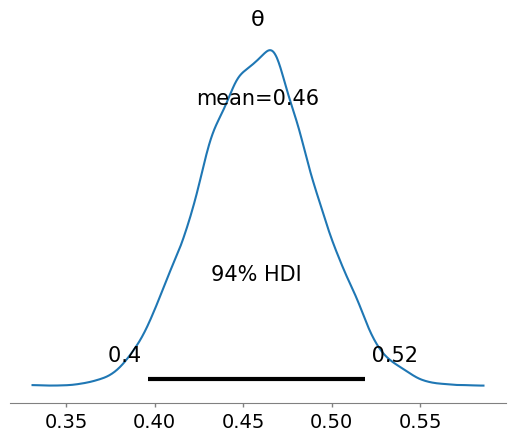

In [39]:
import arviz as az
az.plot_posterior(idata_BDay)
az.summary(idata_BDay)

Notice that this visualization looks very similar to the smooth analytic curve (albeit "lumpier" and less precise beccause it is derived from samples).

Acccording to the pymc model's distribution based on 10000 samples, there is a 94% chance that the true likelihood of a player playing better on their birthday is between .4 & .52 with a mean of .458. Now that we have a model with some samples, we can use it to make some predictions.

In [42]:
pm.sample_posterior_predictive(idata_BDay, model=BDay_better_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

We can see whether our model predicts the next birthday player will play better or worse by looking at the 3d(?) array of y values in the data variables section of the posterior predictive. Lets extract the array that from the first sample and the first draw.

In [43]:
stacked_BDay = az.extract(idata_BDay, group="posterior_predictive")
stacked_BDay.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

This gives us a prediction for the outcomes of the next 209 birthday games (because we initially fed the model 209 games worth of data). The model predicts that the first player to play on his birthday this upcoming season will play better than his average game over the rest of the season, but obverall, most players will play worse on their birthdays.

**Conclusions**

The outcome of this project actually surprised me quite a bit. I expected that players would usually play better on their birthday, as I thought they might be more motivated and get more playing time, but on the contrary, the data, and therefore this model, suggest that they usually play worse. Based on the 10000 samples, it seems its overwhelmingly likely that the chance of a player playing better on their birthday is under 50%. Thinking about it, this result doesn't seem unreasonable. Players might party more on their birthday, leading to worse performance. I might be able to account for factors like this by considering more information. Like if player playing on their birthday in miami played worse than those playing on their birthday in salt lake city, environmental factors could be a major consideration. In any case, I enjoyed working on this and I look forward to seeing if my model is at all accurate (probably not).